In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import tensorflow as tf
import cv2 as cv
import imghdr
from matplotlib import pyplot as plt
import math
import keras
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flower299/Flowers299/Firethorn/c0ecb31d13.jpg
/kaggle/input/flower299/Flowers299/Firethorn/f90ecbd596.jpg
/kaggle/input/flower299/Flowers299/Firethorn/d1907b5dd1.jpg
/kaggle/input/flower299/Flowers299/Firethorn/9ba2f6b030.jpg
/kaggle/input/flower299/Flowers299/Firethorn/cc78573346.jpg
/kaggle/input/flower299/Flowers299/Firethorn/e1f70c71cc.jpg
/kaggle/input/flower299/Flowers299/Firethorn/b0a33606cd.jpg
/kaggle/input/flower299/Flowers299/Firethorn/647187a557.jpg
/kaggle/input/flower299/Flowers299/Firethorn/d9f124bdca.jpg
/kaggle/input/flower299/Flowers299/Firethorn/9912027a87.jpg
/kaggle/input/flower299/Flowers299/Firethorn/4fe111cae6.jpg
/kaggle/input/flower299/Flowers299/Firethorn/5fa2f394cc.jpg
/kaggle/input/flower299/Flowers299/Firethorn/4724199887.jpg
/kaggle/input/flower299/Flowers299/Firethorn/e3a78935df.jpg
/kaggle/input/flower299/Flowers299/Firethorn/69d67f7f4d.jpg
/kaggle/input/flower299/Flowers299/Firethorn/179bbd68dd.jpg
/kaggle/input/flower299/Flowers299/Firet

# **Loading Data**

In [3]:
#https://www.kaggle.com/datasets/bogdancretu/flower299
#https://www.kaggle.com/datasets/rrrrsesrrd/logosiq
# https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals
#animals and logo use basically the same code
#Database used

#Assigné à une variable le dossier 
maindir = '../input/flower299/Flowers299/'

#Déterminer le nombre de classes
totalDir = 0
for base, dirs, files in os.walk(maindir):
    for directories in dirs:
        totalDir += 1
 
print('Total Dir is = ', totalDir)
 

Total Dir is =  299


# ****Data augmentation

In [4]:
#Data augmentation and Training/Validation Data generation
traingen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, zoom_range = 0.2, rotation_range = 25,shear_range = 0.2, height_shift_range=0.1, validation_split =0.2)
valgen = ImageDataGenerator(rescale = 1./255, validation_split =0.2)

traindata = traingen.flow_from_directory(maindir, subset = 'training', class_mode = 'categorical', target_size=(224, 224) )

testdata= valgen.flow_from_directory(maindir, subset = 'validation', class_mode = 'categorical', target_size=(224, 224) )

train_y=traindata.classes
test_y=testdata.classes
 
label = traindata.class_indices
 
#print dictionnary    
print(label)

#reverse dictionniary mappings 
labelinv = {v: k for k , v in traindata.class_indices.items()}

#print(labelinv)

#print (train_y.shape,test_y.shape)

#type(traindata.class_indices)



Found 92873 images belonging to 299 classes.
Found 23071 images belonging to 299 classes.
{'Abutilon': 0, 'Acacia': 1, 'Aconite': 2, 'AfricanDaisy': 3, 'Agapanthus': 4, 'Ageratum': 5, 'Alchemilla': 6, 'Allium': 7, 'Alstroemeria': 8, 'Alyssum': 9, 'Amaranthus': 10, 'Amaryllis': 11, 'Anemone': 12, 'AniseHyssop': 13, 'ArmeriaMaritima': 14, 'Aster': 15, 'Azalea': 16, 'Baby’sBreath': 17, 'Bachelor’sButton': 18, 'BalloonFlower': 19, 'Ballota': 20, 'BeeBalm': 21, 'Begonia': 22, 'Bellflower': 23, 'Bergamot': 24, 'Bergenia': 25, 'Billbergia': 26, 'Black-eyedSusan': 27, 'BlanketFlower': 28, 'BlazingStar': 29, 'BleedingHeart': 30, 'Bletilla': 31, 'Blue-eyedGrass': 32, 'Bluebonnets': 33, 'BluestarFlower': 34, 'Borage': 35, 'Bottlebrush': 36, 'Bouvardia': 37, 'Brachyscome': 38, 'Brassica': 39, 'Broom': 40, 'Buttercup': 41, 'ButterflyBush': 42, 'Calceolaria': 43, 'Calendula': 44, 'CaliforniaPoppy': 45, 'CallaLily': 46, 'Camellia': 47, 'Candytuft': 48, 'CannaLily': 49, 'CapeLeadwort': 50, 'CapePrimro

dict

# **Create dictionnary and save it **

In [ ]:
# save dictionary for further use
import pickle
filename = 'Flowerdic.pkl'  #change name, must be indicative of the current model name
file = open(filename, 'wb')
pickle.dump(labelinv , file)
file.close()




# Slight tweak of vgg 16 and traininig

In [ ]:
mod = tf.keras.applications.VGG16(
    include_top=False, input_shape = (224,224,3),
    weights='imagenet'
)
mod.trainable = False
#Adding only one Layer at the end, too long with more layer
model1 = Sequential()
model1.add(mod)
model1.add(Flatten())
model1.add(Dense(units = totalDir, activation = 'softmax'))
model1.summary()

#Defining early stopping and checkpoint
early_stopping = EarlyStopping( monitor = 'loss', mode = 'max', min_delta = 0.0001,patience = 20,restore_best_weights = True,verbose = 1)
checkpoint = ModelCheckpoint("vgg16_flower.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', patience =4,  period=1)


# Compile
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Train
hisvgg2 = model1.fit(traindata, epochs = 50,validation_data = testdata,  callbacks = [checkpoint, early_stopping])
 

# Retraining with last saved data

In [ ]:
#Si les rtésultats n'étaient pas satisfaisant
model1 = keras.models.load_model("../input/notquitadataset/vgg16_flowersa.h5", compile = False)
model1.summary()

# Compile
#model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model1.load_weights("../input/notquitadataset/vgg16_flower4.h5")

early_stopping = EarlyStopping( monitor = 'loss', mode = 'max',  min_delta = 0.0001 ,patience = 40,restore_best_weights = True,verbose = 1)
checkpoint = ModelCheckpoint("vgg16_flower5.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', patience =4,  period=1)

# Train
hisvgg2 = model1.fit(traindata, epochs = 50,validation_data = testdata,  callbacks = [checkpoint, early_stopping])



In [ ]:
#if needed
#model1 = keras.models.load_model("/kaggle/working/vgg16_flowersa4.h5", compile = True)
 

 #evaluate our model accuracy
loss, acc  = model1.evaluate(testdata,batch_size=32)
print("Trained model, accuracy: {:5.2f}%".format(100 * acc))
#model1.save('vgg16_flowersa5.h5')

Plot figures for our Training

In [7]:
model1.save('vgg16_flowersa4.h5')
plt.plot(hisvgg2.history['accuracy']) 
plt.plot(hisvgg2.history['val_accuracy'])
plt.plot(hisvgg2.history['loss']) 
plt.plot(hisvgg2.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"]) 
plt.show()

# ** VGG 16 tuning **

In [ ]:
#Just adding the depth. Could be make training too long
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False# Freeze  all layers of VGG-16 for now

#for layers in (base_model.layers)[:18]:  # Unfreezing of layers of VGG-16
    #layers.trainable = False
    
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.15)(x)
x = tf.keras.layers.Dense(256, activation= 'relu')(x)
outputs = tf.keras.layers.Dense(totalDir, activation= 'softmax')(x)
model = tf.keras.Model(inputs, outputs)


model.summary()

opti = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=opti,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss",# Stop training when `val_loss` is no longer improving,
min_delta=0.0001,# "no longer improving" being defined as "no better than 0.0001 less"
patience=10,# "no longer improving" being further defined as "for at least 2 epochs"
verbose=1,restore_best_weights=True)
checkpoint = ModelCheckpoint("vgg16_animals1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', patience =4,  period=1)

callback=[checkpoint,early] 
hist= model.fit(traindata, validation_data=testdata, epochs=50,
    callbacks = callback
        )


VGG16 Decode and evaluation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 299)               7501611   
Total params: 22,216,299
Trainable params: 7,501,611
Non-trainable params: 14,714,688
_________________________________________________________________
{0: 'Abutilon', 1: 'Acacia', 2: 'Aconite', 3: 'AfricanDaisy', 4: 'Agapanthus', 5: 'Ageratum', 6: 'Alchemilla', 7: 'Allium', 8: 'Alstroemeria', 9: 'Alyssum', 10: 'Amaranthus', 11: 'Amaryllis', 12: 'Anemone', 13: 'AniseHyssop', 14: 'ArmeriaMaritima', 15: 'Aster', 16: 'Azalea', 17: 'Baby’sBreath', 18: 'Bachelor’sButton', 19: 'BalloonFlower', 20: 'Ballota', 21: 'BeeBa

(-0.5, 223.5, 223.5, -0.5)

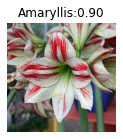

In [17]:
import pickle

#Load model from wherever
model = tf.keras.models.load_model('/kaggle/working/vgg16_flowersa4.h5')

#Show model architecture
model.summary()

#Load associated dictionary
dic= open("/kaggle/working/Flowerdic.pkl", "rb")
dictionary = pickle.load(dic)
print (dictionary)


#Loading image 
from keras.preprocessing.image import image
from keras.preprocessing.image import load_img

# load an image from file at VGG16 input size
image = load_img('/kaggle/input/notquitadataset/ambiance_c.jpg', target_size=(224, 224))
 
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
imgarr = img_to_array(image)

# create batch
imgbatch = np.expand_dims(imgarr, axis=0)
#imgbatch = preprocess_input(imgbatch)

# predict the probability across all output classes
prediction = model.predict(imgbatch)

 #Join classifaction score
score = tf.nn.softmax(prediction[0])

print(
    "{} most likely belongs to {} with a {:.2f} percent confidence."
.format("Image inputted :", dictionary[np.argmax(score)], 100 * np.max(score))
)

print(dictionary[np.argmax(score)])

#print to verify shape
plt.figure(figsize=(2, 2))
#plt.imshow((imgarr[0]).astype('uint8'))
plt.imshow((image))
plt.title("{}:{:.2f}".format(dictionary[np.argmax(score)], 100 * np.max(score))) #remplacer par label, 100 * np.max(score)))
plt.axis('off')
                      
 